# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

### Read Data and Some prelim works

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)

In [9]:
# load data and read the first 5 rows

df = pd.read_csv('../DATA/lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Exploratory Data Analysis

**Analyzing target variable.**

In [13]:
# check the target value counts
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

c:\users\budha\desktop\learnings\tensorflow\my_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


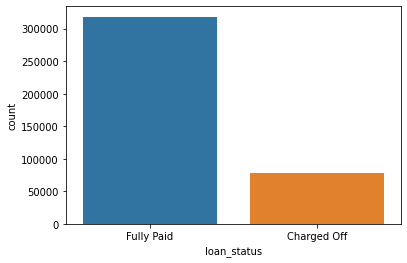

In [12]:
# plot
sns.countplot(df['loan_status'])
plt.show();

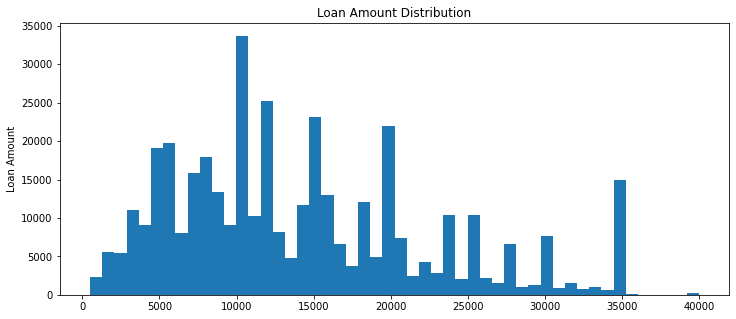

In [17]:
# Plot how the loan_amnt feature is distributed

plt.figure(figsize=(12,5))
df['loan_amnt'].plot.hist(bins = 50)
plt.ylabel('Loan Amount')
plt.title('Loan Amount Distribution')
plt.show()

**Explore correlation between the continuous feature variables. 
Calculate the correlation between all continuous numeric variables.**

In [18]:
# find correlation
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


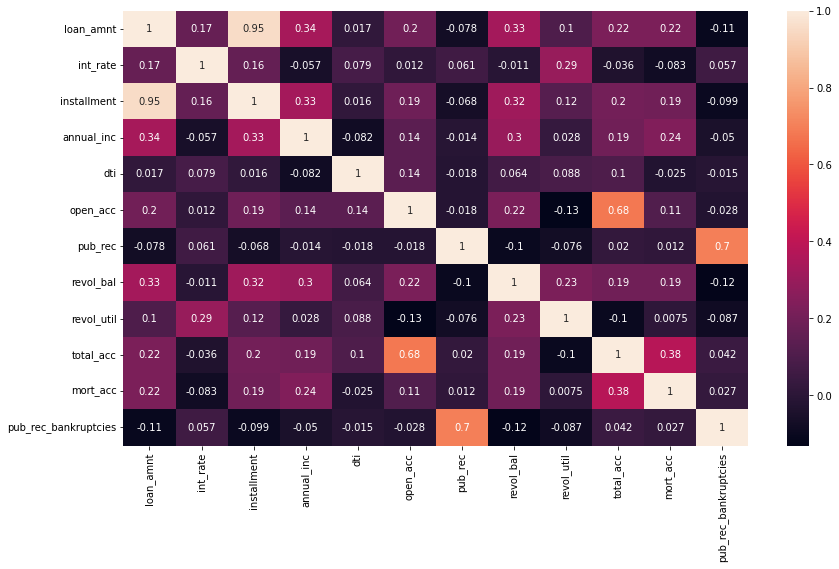

In [20]:
# Visualize correlation

plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

- We observed a perfect correlation with the "installment" feature. Lets Explore this feature further.

In [21]:
# Check the description of the loan_amnt feature

feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [22]:
# Check the description of the intallment feature

feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


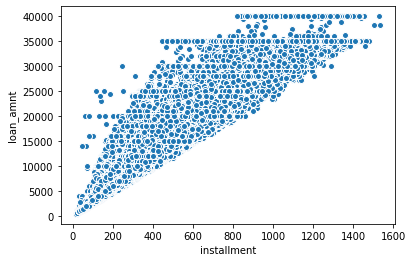

In [25]:
# check the relation visaully

plt.scatter(df['installment'], df['loan_amnt'], edgecolor='white')
plt.xlabel('installment')
plt.ylabel('loan_amnt')
plt.show();

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

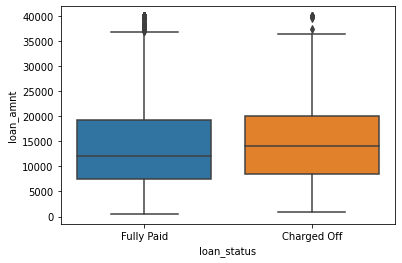

In [26]:
# relationship between loan_status and loan_amount

sns.boxplot(x = 'loan_status', y='loan_amnt', data = df)

**Lets Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [28]:
# check the loan_amnt data based on loan_status

df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [29]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [36]:
# unique values of grade feature

df['grade'].unique()

['B', 'A', 'C', 'E', 'D', 'F', 'G']

In [32]:
# unique values of sub_grade feature

df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

**Create a countplot per grade. Set the hue to the loan_status label.**

c:\users\budha\desktop\learnings\tensorflow\my_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

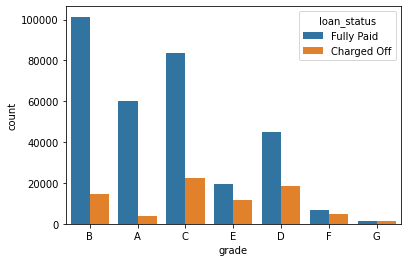

In [40]:
# plot counts of grade based on different loan status values

sns.countplot(df['grade'], hue=df['loan_status'])

**Similarly display a count plot per subgrade based on "loan_status"**

c:\users\budha\desktop\learnings\tensorflow\my_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


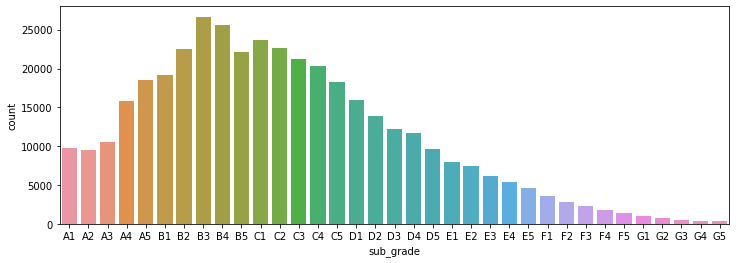

In [46]:
# subgrade based on loan_status

plt.figure(figsize=(12, 4))
sns.countplot(df['sub_grade'].sort_values())
plt.show();

c:\users\budha\desktop\learnings\tensorflow\my_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


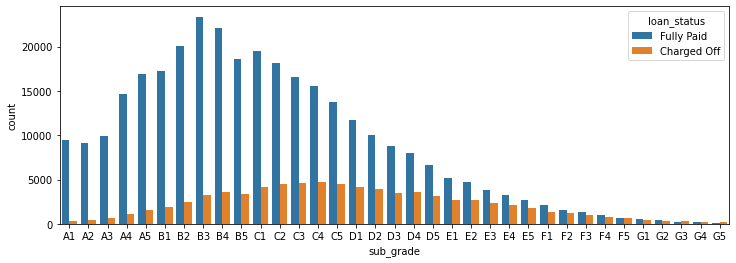

In [47]:
# plot subgrade count for different loan_status values

plt.figure(figsize=(12, 4))
sns.countplot(df['sub_grade'].sort_values(), hue=df['loan_status'])
plt.show();

**It looks like F and G subgrades don't get paid back that often. Lets isloate those and recreate the countplot just for those subgrades.**

In [63]:
# F and G sub grades
FG_grades = [grade for grade in df['sub_grade'].unique() if 'F' in grade] + [grade for grade in df['sub_grade'].unique() if 'G' in grade]
FG_grades

['F4', 'F5', 'F1', 'F3', 'F2', 'G1', 'G2', 'G5', 'G4', 'G3']

c:\users\budha\desktop\learnings\tensorflow\my_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


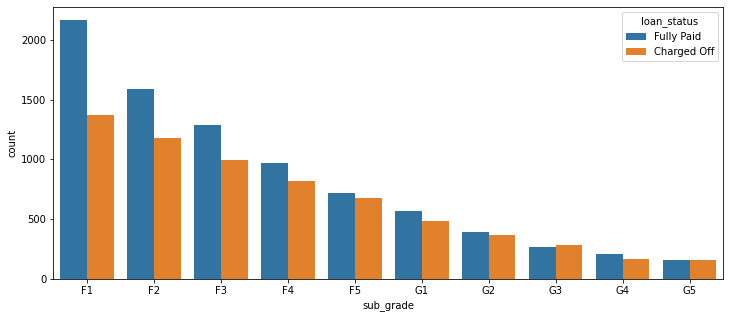

In [79]:
# plot the F and G sub grade values for different loan status values

plt.figure(figsize=(12,5))
sns.countplot(df[df['sub_grade'].isin(FG_grades)]['sub_grade'].sort_values(), hue = df['loan_status'])
plt.show();

**Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [88]:
# unique values for loan status

df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [86]:
# create the new column

df['loan_repaid'] = np.where(df['loan_status'] == 'Fully Paid', 1, 0)

In [87]:
# check the values

df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**Create a bar plot showing the correlation of the numeric features to the new loan_repaid column.**

<AxesSubplot:>

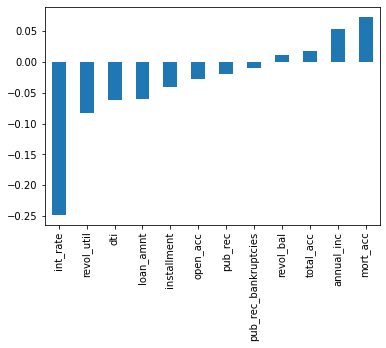

In [92]:
# relation between the numeric features and the loan repaid labels

df.corr()['loan_repaid'][:-1].sort_values().plot.bar()

## Data PreProcessing

**Here I remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**

### Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

In [94]:
# dataframe length
len(df)

396030

**Create a Series that displays the total count of missing values per column.**

In [95]:
# all null values 
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Percentage of null values per feature**

In [96]:
# null value percentage

df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64

**Let's examine emp_title and emp_length to see whether it will be okay to drop them.**

In [97]:
# feature description for emp_title

feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [98]:
# feature description for emp_length

feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [99]:
# unique values of emp title

df['emp_title'].nunique()

173105

In [100]:
# emp title value counts

df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [101]:
# remove emp_title column
df.drop('emp_title', axis = 1, inplace=True)

In [128]:
# sort the emp_length values

sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [133]:
# set the emp_length in an order

emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

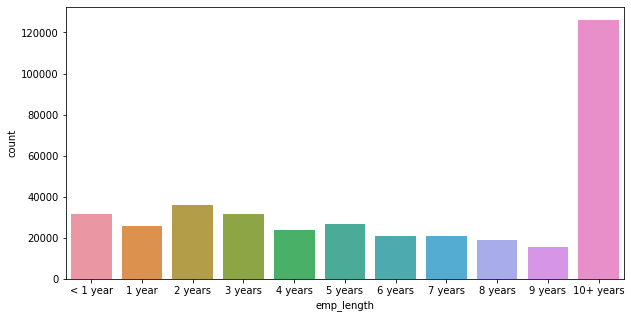

In [136]:
# plot the value count of emp length feature

plt.figure(figsize=(10, 5))
sns.countplot(x = 'emp_length', data = df, order=emp_length_order)
plt.show();

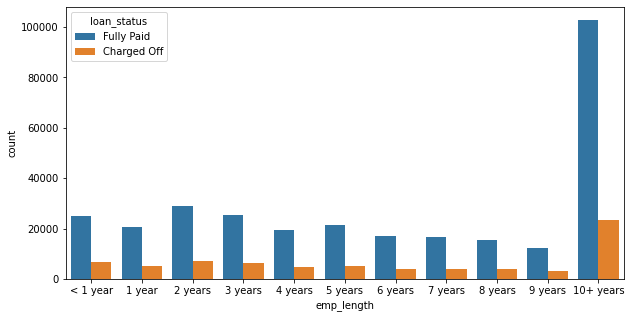

In [140]:
# plot count values of emp length for different loan status values

plt.figure(figsize=(10, 5))
sns.countplot(x = 'emp_length', data = df, order=emp_length_order, hue='loan_status')
plt.show();

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. Lets create series to find these informations.**

In [159]:
# find loan status counts for differnt emp length groups for each loan status values

emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length')['loan_status'].count()
emp_paid = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length')['loan_status'].count()

print(emp_co)
print(emp_paid)

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64
emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64


In [160]:
# find the ratio

emp_co/emp_paid

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

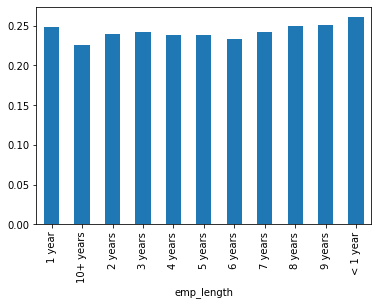

In [161]:
# plot this ratio

(emp_co/emp_paid).plot.bar()

**Charge off rates are extremely similar across all employment lengths. Lets go ahead and drop the emp_length column.**

In [163]:
# drop emp length feature

df.drop('emp_length', axis = 1, inplace = True)

**Revisit the DataFrame to see what feature columns still have missing data.**

In [164]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Lets review the title column vs the purpose column. Is this repeated information?**

In [168]:
# unique values of purpose

list(df['purpose'].unique())

['vacation',
 'debt_consolidation',
 'credit_card',
 'home_improvement',
 'small_business',
 'major_purchase',
 'other',
 'medical',
 'wedding',
 'car',
 'moving',
 'house',
 'educational',
 'renewable_energy']

In [169]:
# unique values of title

list(df['title'].unique())

['Vacation',
 'Debt consolidation',
 'Credit card refinancing',
 'Credit Card Refinance',
 'Home improvement',
 'No More Credit Cards',
 'Debt Consolidation',
 'Business',
 'Major purchase',
 'Debt Consolidation/Home Repairs',
 'kawasaki jetski',
 'Medical and Post Graduate Education Expenses',
 'Credit card debt',
 'concolidation',
 'Consolidation Loan',
 'Consolidate debt',
 'Pay Off Credit Card',
 'Cover',
 'Making a difference',
 'Debt Consalidation',
 'Thank you for your help!',
 'Medical expenses',
 'debt consolidation',
 'Other',
 'Dental Work',
 'Dept Consolodation/Home Improvement',
 'Want to be debt free in "3"',
 'Moving Forward',
 'Bills',
 'Honost Consolidation',
 'home expenses',
 'Pay the Bills',
 'Debt Loan',
 'Car financing',
 'Moving and relocation',
 'Home buying',
 'credit card refinance loan',
 'Moving Payoff',
 'Small Business Loan - Gourmet Food Truck',
 'consolidation loan',
 'first loan',
 'Personal',
 'Consolidation',
 'Loan',
 'The trailer',
 'Fiscal Responsi

**The title column is simply a string subcategory/description of the purpose column. LEts go ahead and drop the title column.**

In [170]:
# drop title feature

df.drop('title', axis =1, inplace = True)

**Lets find out what the mort_acc feature represents**

In [172]:
# feature description for mort_acc

feat_info('mort_acc')

Number of mortgage accounts.


In [173]:
# value counts for mort_acc

df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

**We will try to fill the missing values based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [176]:
# correlation with other features

print('Correlation with the mort_acc column')
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [180]:
tot_acc_mort_acc = df.groupby('total_acc')['mort_acc'].mean()
tot_acc_mort_acc

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.**

In [195]:
tot_acc_mort_acc.loc[3.0]

0.05202312138728324

In [196]:
# def return_tot(total_acc):
#     return tot_acc_mort_acc.loc[total_acc]

In [206]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return tot_acc_mort_acc[total_acc]
    else:
        return mort_acc

In [207]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [201]:
# CODE HERE
#test['mort_acc'].fillna(df['total_acc'].apply(return_tot), inplace = True)

In [208]:
# check for missing values in the dataframe

df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Lets go ahead and remove the rows that are missing those values in those columns.**

In [213]:
# remove observations with missing values
df = df.dropna()

In [214]:
# check for missing values

df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

In [215]:
# all categorical columns

[col for col in df.columns if df[col].dtype == 'O'] 

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**Lets convert the term feature into either a 36 or 60 integer numeric data type.**

In [216]:
# value counts term feature
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [220]:
# create the dictionary for mapping
term_dict = {' 36 months' : 36,
            ' 60 months': 60}

In [226]:
# map it
df['term'] = df['term'].map(term_dict)

C:\Users\budha\AppData\Local\Temp\ipykernel_22180\4230660897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['term'] = df['term'].map(term_dict)


In [227]:
# check the unique values and confirm
df['term'].unique()

array([36, 60], dtype=int64)

In [228]:
# check the datatype
type(df['term'][0])

numpy.int64

### grade feature

**We already know grade is part of sub_grade, so lets just drop the grade feature.**

In [232]:
# drop grade feature

df.drop('grade', axis = 1, inplace = True)

**Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. We will drop the original subgrade column**

In [238]:
# get dummies for sub grade
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
subgrade_dummies.head()

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [240]:
# concat with the original data
df = pd.concat([df.drop('sub_grade', axis=1), subgrade_dummies], axis = 1)

In [241]:
# check the columns
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [245]:
# check for the categorical columns
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**Lets convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe and to drop the original columns.**

In [249]:
# get dummy values
dummies_2 = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']], drop_first=True)
dummies_2.head()

,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [252]:
# concat with original data and drop the original columns

df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'], axis =1 ), dummies_2], axis = 1)

In [255]:
# check for cat columns

df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

### home_ownership
**Lets review the value_counts for the home_ownership column.**

In [256]:
# value counts
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**Lets convert these to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe and to drop the original columns.**

In [258]:
# unique values
list(df['home_ownership'].unique())

['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE']

In [259]:
# create dict for mapping
home_owner_dict = {
    'RENT' : 'RENT',
    'MORTGAGE' : 'MORTGAGE',
    'OWN' : 'OWN',
    'OTHER' : 'OTHER',
    'NONE' : 'OTHER',
    'ANY' : 'OTHER'
}

In [261]:
# map with the values
df['home_ownership'] = df['home_ownership'].map(home_owner_dict)

In [263]:
# check and test
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [264]:
# create dummy values
home_owner_dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

In [266]:
# concat with the data and remove the original column
df = pd.concat([df.drop('home_ownership', axis = 1), home_owner_dummies], axis = 1)
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### address
**Let's feature engineer a zip code column from the address in the data set. Lets create a column called 'zip_code' that extracts the zip code from the address column.**

In [277]:
# function to extract zip code from address
def extract_zip(address):
    return address[-5:]

In [278]:
df['address'][0]

'0174 Michelle Gateway\r\nMendozaberg, OK 22690'

In [281]:
# create zip_code feature column
df['zip_code'] = df['address'].apply(extract_zip)

In [283]:
df['zip_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

**Let make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [284]:
zip_dummies = pd.get_dummies(df['zip_code'], drop_first=True)

In [286]:
df = pd.concat([df.drop(['zip_code','address'], axis =1), zip_dummies], axis = 1)
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [287]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'

### issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, so lets drop this feature.**

In [289]:
# drop issue_d feature column
df.drop('issue_d', axis = 1, inplace = True)

### earliest_cr_line
**This appears to be a historical time stamp feature. Lets extract the year from this feature, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [291]:
# check the first 5 data 
df['earliest_cr_line'].head()

0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [294]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x : x[-4:])

In [297]:
df['earliest_cr_year'] = df['earliest_cr_year'].astype(int)

In [300]:
df.drop(['earliest_cr_line'],axis = 1, inplace=True)

In [301]:
df.select_dtypes('object').columns

Index(['loan_status'], dtype='object')

## Train Test Split

In [302]:
# import library for train test split
from sklearn.model_selection import train_test_split

**Lets rop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [305]:
# drop loan status feature column
df.drop('loan_status', axis = 1, inplace = True)

In [307]:
# Set X and y values
X = df.drop('loan_repaid', axis = 1).values
y = df['loan_repaid'].values

In [309]:
y

array([1, 1, 1, ..., 1, 1, 1])

### Grabbing a Sample for Training Time

**I'll grab a sample of the 490k+ entries to save time on training. Also since I'm not using any GPU**

In [311]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


In [312]:
# grab 1% of the data
df = df.sample(frac=0.1, random_state=101)

In [313]:
# check length of the sampled data
len(df)

39522

In [314]:
# get feature and label data

X = df.drop('loan_repaid', axis = 1).values
y = df['loan_repaid'].values

In [315]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) 

## Normalizing the Data

**I'll use a MinMaxScaler to normalize the feature data X_train and X_test.**

In [316]:
# import MinMAxScaler
from sklearn.preprocessing import MinMaxScaler

In [317]:
scaler = MinMaxScaler()

In [319]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [321]:
X_train.shape, X_test.shape

((31617, 78), (7905, 78))

## Creating the Model

In [320]:
# import tensorflow libraries for training

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**I'll build a sequential model to trai on the data. We have many options here, but I'' use as a model that goes 78 --> 39 --> 19--> 1 output neuron.**

In [322]:
# initialize Sequential model
model = Sequential()

# input layer
model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units = 1, activation='sigmoid'))

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# compile
model.compile(optimizer='adam', loss='binary_crossentropy')

In [323]:
# fit the model
model.fit(X_train,
          y_train,
          batch_size=256, # using batch size of 256
          epochs=25,
          validation_data=(X_test, y_test),
          verbose=1)

Epoch 1/25
124/124 [==============================] - 2s 6ms/step - loss: 0.4477 - val_loss: 0.3484
Epoch 2/25
124/124 [==============================] - 1s 5ms/step - loss: 0.3407 - val_loss: 0.2941
Epoch 3/25
124/124 [==============================] - 1s 4ms/step - loss: 0.2988 - val_loss: 0.2813
Epoch 4/25
124/124 [==============================] - 0s 4ms/step - loss: 0.2823 - val_loss: 0.2751
Epoch 5/25
124/124 [==============================] - 0s 4ms/step - loss: 0.2750 - val_loss: 0.2737
Epoch 6/25
124/124 [==============================] - 0s 4ms/step - loss: 0.2737 - val_loss: 0.2718
Epoch 7/25
124/124 [==============================] - 0s 4ms/step - loss: 0.2704 - val_loss: 0.2721
Epoch 8/25
124/124 [==============================] - 0s 4ms/step - loss: 0.2687 - val_loss: 0.2708
Epoch 9/25
124/124 [==============================] - 0s 4ms/step - loss: 0.2663 - val_loss: 0.2701
Epoch 10/25
124/124 [==============================] - 0s 4ms/step - loss: 0.2641 - val_loss: 0.2705

**Saving the model.**

In [324]:
# saving model
model.save('Predict_loan_default.h5')

### Evaluating Model Performance.

<AxesSubplot:>

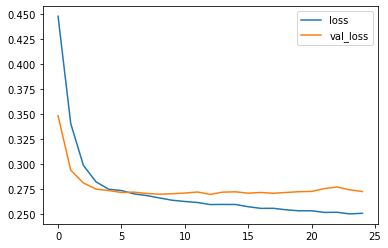

In [327]:
# loss values for train and test data
pd.DataFrame(model.history.history).plot()

**Lets create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [335]:
# import libraries for evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [328]:
# get prediction for our test data
test_preds = model.predict(X_test)
test_preds

248/248 [==============================] - 0s 1ms/step


array([[1.0000000e+00],
       [6.8624645e-01],
       [9.9982584e-01],
       ...,
       [1.0000000e+00],
       [1.0000000e+00],
       [2.7872539e-07]], dtype=float32)

In [331]:
# convert the test pred values into class values as the output of the model is in terms of probability ratio
test_preds = np.where(test_preds > 0.5, 1, 0)

In [333]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.92      0.45      0.60      1570
           1       0.88      0.99      0.93      6335

    accuracy                           0.88      7905
   macro avg       0.90      0.72      0.77      7905
weighted avg       0.89      0.88      0.87      7905



In [334]:
print(confusion_matrix(y_test, test_preds))

[[ 701  869]
 [  59 6276]]


In [336]:
# accuracy of the model
accuracy_score(y_test, test_preds)

0.882605945604048

- The model didnt perform that well as we can see in the above results
- The recall value is not that great
- We can still change the hyper parameter values and re-train the model again for better performance

**Given the customer below, would you offer this person a loan?**

In [337]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   36.00
int_rate                7.90
installment           782.26
annual_inc          62000.00
                      ...   
48052                   0.00
70466                   1.00
86630                   0.00
93700                   0.00
earliest_cr_year     1991.00
Name: 385487, Length: 78, dtype: float64

In [350]:
input_val = new_customer.values.reshape(-1, 78)

In [352]:
# predict on the new customer
np.where(model.predict(scaler.transform(input_val)) > 0.5, 1, 0)

1/1 [==============================] - 0s 19ms/step


array([[1]])

**Lets check, if this person actually end up paying back their loan?**

In [355]:
data.iloc[random_ind]['loan_repaid']

1.0

- The customer did repay the loan back as it was also predicted by our model